In [1]:
from rdkit import Chem

In [2]:
lines = open('data/small.smi').readlines()
mols = [Chem.MolFromSmiles(x) for x in lines]

In [3]:
r_info = mols[0].GetRingInfo()

In [4]:
from __future__ import print_function
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from IPython.display import SVG
import time
print(time.asctime())
from rdkit.Chem import rdDepictor
from rdkit.Chem.Draw import rdMolDraw2D

Thu Feb 15 11:17:01 2018


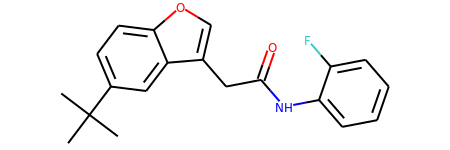

In [5]:
m = mols[0]
m

In [72]:
import itertools
# NOTE(LESWING) this version does not handle bridged rings correctly see version later
flatten = lambda l: [item for sublist in l for item in sublist]
r_info = m.GetRingInfo()

v1 = set()
bond_rings = set(flatten(r_info.BondRings()))
all_bonds = [x.GetIdx() for x in m.GetBonds()]
non_ring_bonds = set(all_bonds) - bond_rings
v1 = set([tuple(sorted(
        [m.GetBonds()[x].GetBeginAtom().GetIdx(), m.GetBonds()[x].GetEndAtom().GetIdx()])) 
          for x in non_ring_bonds])


v2 = set()
v2.update([tuple(sorted((x))) for x in r_info.AtomRings()])
to_merge = set()
for r1, r2 in itertools.product(v2, repeat=2):
    if r1 >= r2:
        continue
    intersection = set(r1).intersection(set(r2))
    if len(intersection) >= 3:
        to_merge.add((r1,r2))

for r1, r2 in to_merge:
    v2.remove(r1)
    v2.remove(r2)
    s1 = set()
    s1.update(r1)
    s1.update(r2)
    v2.add(s1)

all_clusters = set()
all_clusters.update(v1)
all_clusters.update(v2)
v0 = set()
for atom in m.GetAtoms():
    atom_id = atom.GetIdx()
    count = sum([
        atom_id in x for x in all_clusters
    ])
    if count >= 3:
        v0.add(atom_id)



TypeError: unhashable type: 'set'

In [7]:
def draw_cluster(m, atom_ids):
    colors = {}
    for atom in atom_ids:    
        colors[atom] = (1, 0, 0)
    drawer = rdMolDraw2D.MolDraw2DSVG(400,200)
    drawer.DrawMolecule(m,highlightAtoms=atom_ids,highlightAtomColors=colors)
    drawer.FinishDrawing()
    svg = drawer.GetDrawingText().replace('svg:','')
    return SVG(svg)


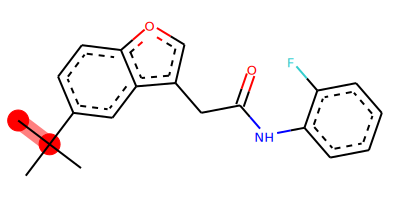

In [8]:
from rdkit.Chem import AllChem
AllChem.Compute2DCoords(m)
draw_cluster(m, list(all_clusters)[0])

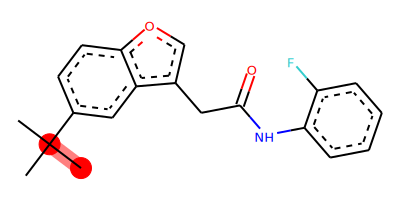

In [9]:
draw_cluster(m, list(all_clusters)[1])

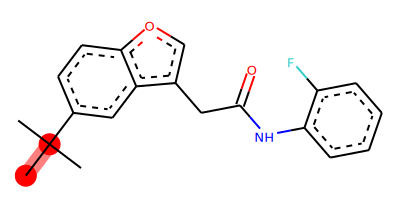

In [10]:
draw_cluster(m, list(all_clusters)[2])

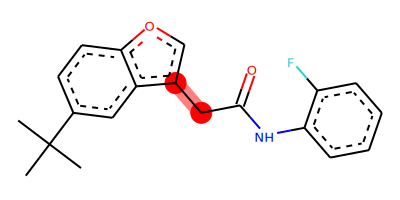

In [11]:
draw_cluster(m, list(all_clusters)[3])

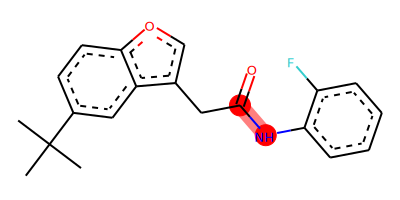

In [12]:
draw_cluster(m, list(all_clusters)[4])

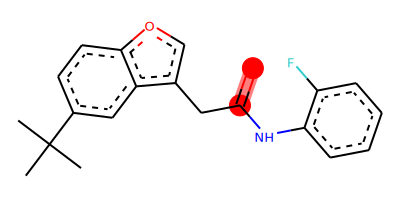

In [13]:
draw_cluster(m, list(all_clusters)[5])

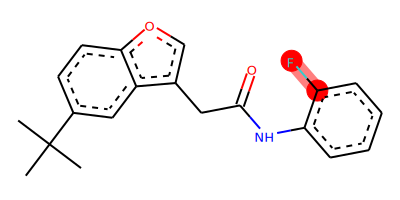

In [14]:
draw_cluster(m, list(all_clusters)[6])

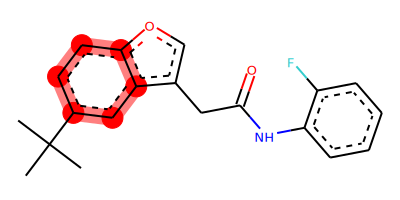

In [15]:
draw_cluster(m, list(all_clusters)[7])

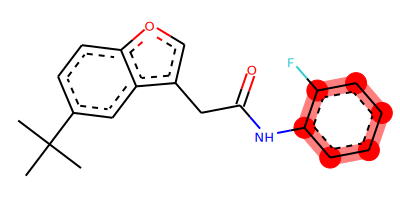

In [16]:
draw_cluster(m, list(all_clusters)[8])

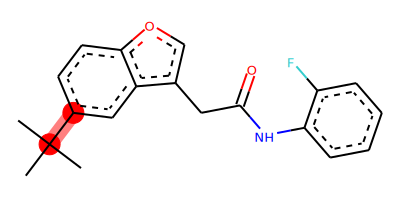

In [17]:
draw_cluster(m, list(all_clusters)[9])

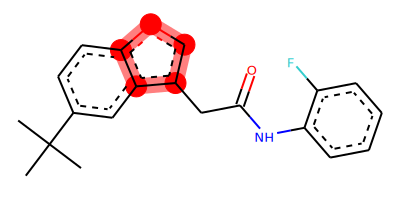

In [18]:
draw_cluster(m, list(all_clusters)[10])

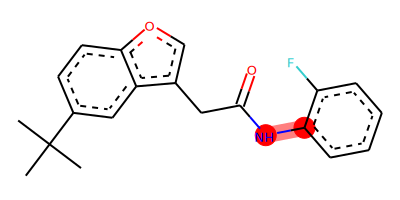

In [19]:
draw_cluster(m, list(all_clusters)[11])

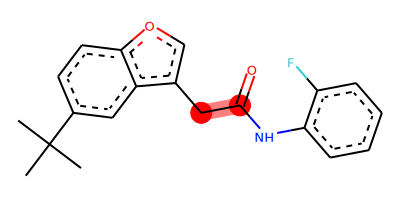

In [20]:
draw_cluster(m, list(all_clusters)[12])

In [21]:
from rdkit.Chem import EditableMol
def create_substructure(m, atom_ids):
    emol = EditableMol(m)
    to_remove_ids = [x.GetIdx() for x in m.GetAtoms()]
    for atom_id in atom_ids:
        to_remove_ids.remove(atom_id)
    to_remove_ids.reverse()
    for atom_id in to_remove_ids:
        emol.RemoveAtom(atom_id)
    return emol.GetMol()
    

In [23]:
frag = create_substructure(m, list(all_clusters)[10])

In [24]:
Chem.MolToSmiles(frag)

'c1ccoc1'

In [25]:
m = Chem.MolFromSmiles('Cc1c(Br)c(C(=O)NC(C)C23CC4CC(CC(C4)C2)C3)nn1C')

In [62]:
import itertools
import networkx as nx

flatten = lambda l: [item for sublist in l for item in sublist]
r_info = m.GetRingInfo()

v1 = set()
bond_rings = set(flatten(r_info.BondRings()))
all_bonds = [x.GetIdx() for x in m.GetBonds()]
non_ring_bonds = set(all_bonds) - bond_rings
v1 = set([tuple(sorted(
        [m.GetBonds()[x].GetBeginAtom().GetIdx(), m.GetBonds()[x].GetEndAtom().GetIdx()])) 
          for x in non_ring_bonds])


v2 = set()
v2.update([tuple(sorted((x))) for x in r_info.AtomRings()])
to_merge = set()
for r1, r2 in itertools.product(v2, repeat=2):
    if r1 >= r2:
        continue
    intersection = set(r1).intersection(set(r2))
    if len(intersection) >= 3:
        to_merge.add((r1,r2))

g = nx.Graph()
for f, t in to_merge:
    g.add_edge(f, t)
graphs = list(nx.connected_component_subgraphs(g))
to_merge = [list(x.nodes) for x in graphs]

for merge_keys in to_merge:
    s1 = set()
    for merge_key in merge_keys:
        v2.remove(merge_key)
        s1.update(merge_key)
    s1 = tuple(sorted(list(s1)))
    v2.add(s1)

all_clusters = set()
all_clusters.update(v1)
all_clusters.update(v2)
v0 = set()
for atom in m.GetAtoms():
    atom_id = atom.GetIdx()
    count = sum([
        atom_id in x for x in all_clusters
    ])
    if count >= 3:
        v0.add(atom_id)


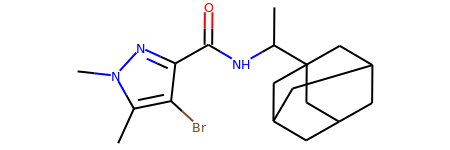

In [58]:
AllChem.Compute2DCoords(m)
m

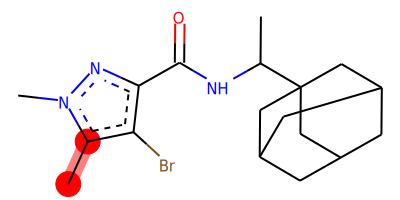

In [59]:
draw_cluster(m, list(all_clusters)[0])

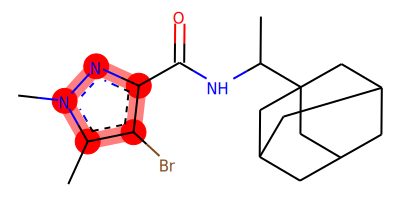

In [60]:
draw_cluster(m, list(all_clusters)[1])

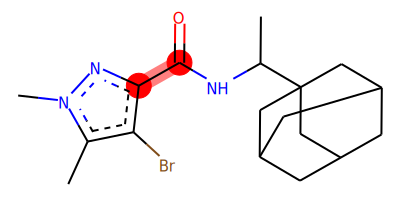

In [64]:
draw_cluster(m, list(all_clusters)[2])

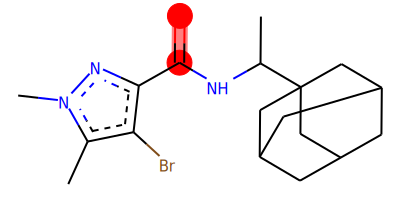

In [65]:
draw_cluster(m, list(all_clusters)[3])

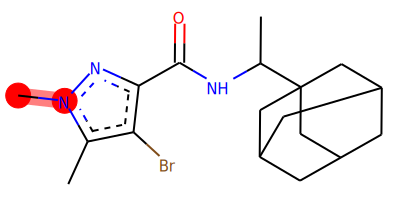

In [66]:
draw_cluster(m, list(all_clusters)[4])

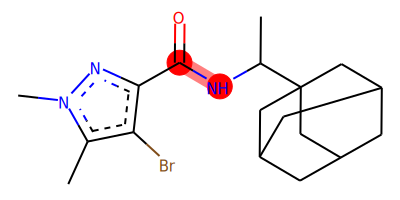

In [67]:
draw_cluster(m, list(all_clusters)[5])

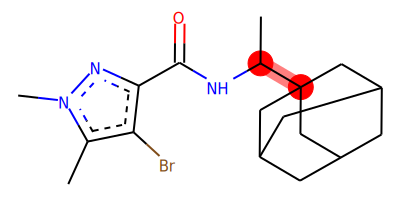

In [68]:
draw_cluster(m, list(all_clusters)[6])

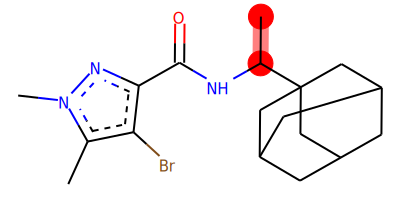

In [69]:
draw_cluster(m, list(all_clusters)[7])

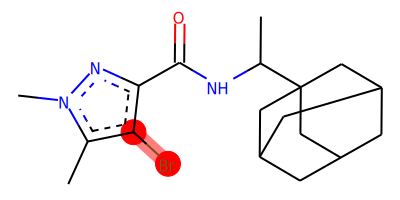

In [70]:
draw_cluster(m, list(all_clusters)[8])

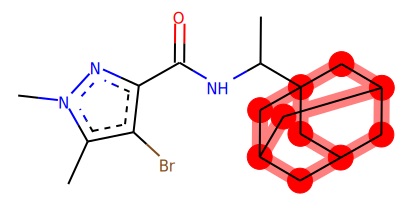

In [71]:
draw_cluster(m, list(all_clusters)[9])

In [75]:
list(g.nodes())

[(10, 11, 12, 13, 14, 19),
 (10, 11, 12, 16, 17, 18),
 (10, 14, 15, 16, 18, 19),
 (12, 13, 14, 15, 16, 17)]